In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm as cmplt

import sys
sys.path.insert(0, '../../opticalforces')

from beam import VectorialFrozenWave
from particle import SphericalParticle

fig_num = 0

In [2]:
L = 1e-3

def lip_const_func(z):
    return 1 if abs(z) < 0.1*L else 0
    
vfw = VectorialFrozenWave(centered=True)
vfw.name = 'lip-const'
vfw.wavelength = 1064e-9
vfw.medium_refractive_index = 1.33
vfw.N = 15
vfw.L = L
vfw.Q = 0.95*vfw.wavenumber
vfw.reference_function = lip_const_func

print(vfw)

name: lip-const
    _amplitude: 1
    _phase: 0
    _vacuum_wavelength: 1.4151200000000001e-06
    _vacuum_wavenumber: 4440037.104400747
    _medium_refractive_index: 1.33
    _wavelength: 1.064e-06
    _wavenumber: 5905249.348852994
    _Q: 5609986.881410344
    _N: 15
    _L: 0.001
    _bessel_order: 0
    _reference_function: lip_const_func

beam 1 (-15): vectorial-bessel-beam
    _amplitude: (7.3938817058953405e-09+0j)
    _phase: 0
    _longitudinal_wavenumber: 5515739.10180265
    _transversal_wavenumber: 2109168.5643812357
    _bessel_spot: 1.14017703388e-06
    _axicon_angle: 0.3652345864355247
    _axicon_angle_degree: 20.926400334961635
    _bessel_order: 0

beam 2 (-14): vectorial-bessel-beam
    _amplitude: (0.014275524455229652+0j)
    _phase: 0
    _longitudinal_wavenumber: 5522022.2871098295
    _transversal_wavenumber: 2092663.310900976
    _bessel_spot: 1.14916983787e-06
    _axicon_angle: 0.3622439000822862
    _axicon_angle_degree: 20.755046629073693
    _bessel_orde

/home/arantespp/.local/lib/python3.5/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


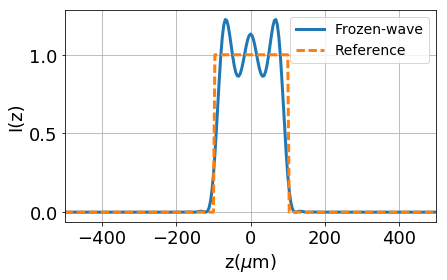

In [5]:
z = np.linspace(-L/2, L/2, 251)

fig_num += 1
plt.figure(fig_num, figsize=(4*1.618, 4))

plt.plot([z*1e6 for z in z], [vfw.intensity(0, 0, z) for z in z], lw=3, label='Frozen-wave')
plt.plot([z*1e6 for z in z], [vfw.reference_function(z)**2 for z in z], '--', lw=3, label='Reference')
plt.legend(fontsize=12, loc=1)
plt.xlim([-L/2*1e6, L/2*1e6])
plt.legend(fontsize=14, loc=1)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.xlabel(r'z($\mu$m)', fontsize=18)
plt.ylabel('I(z)', fontsize=18)
plt.grid()
plt.tight_layout()
plt.savefig('LIP-const-perfil-2D.png',  dpi=300)
plt.show()

### 3D plot

In [7]:
rho_max = 25e-6
z_max = 200e-6

rho = np.linspace(-rho_max, rho_max, 251)
z = np.linspace(-z_max, z_max, 251)
RHO, Z = np.meshgrid(rho, z)

vinty = np.vectorize(lambda rho, z: vfw.intensity(rho, 0, z, 'cylindrical'))

INTY = vinty(RHO, Z)

RHO = [rho*1e6 for rho in RHO]
Z = [z*1e6 for z in Z]

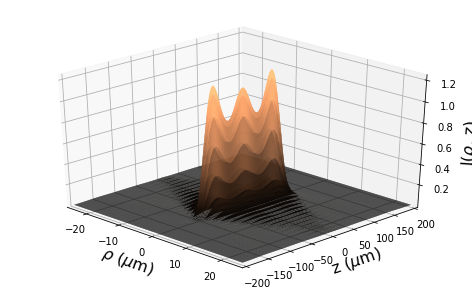

In [11]:
fig_num += 1
plt.figure(fig_num, figsize=(5*1.618, 5))
ax = plt.gca(projection='3d')

# https://matplotlib.org/examples/color/colormaps_reference.html
ax.plot_surface(RHO, Z, INTY, rcount=1000, ccount=1000, alpha=1, cmap=cmplt.copper)
#cset = ax.contourf(RHO, Z, INTY, zdir='z', offset=0, cmap=cmplt.coolwarm)
#cset = ax.contourf(RHO, Z, INTY, zdir='x', offset=-Rmax, cmap=cmplt.coolwarm)
#cset = ax.contourf(RHO, Z, INTY, zdir='y', offset=Zmax, cmap=cmplt.coolwarm)

ax.set_xlabel(r'$\rho$ ($\mu$m)', fontsize=16)
ax.set_xlim(-rho_max*1e6, rho_max*1e6)
ax.set_ylabel(r'z ($\mu$m)', fontsize=16)
ax.set_ylim(-z_max*1e6, z_max*1e6)
ax.set_zlabel(r'I($\rho$, z)', fontsize=16)

ax.view_init(elev=30, azim=-45)

plt.savefig('LIP-const-perfil-3D.png',  dpi=300)
plt.show()

### Longitudinal forces

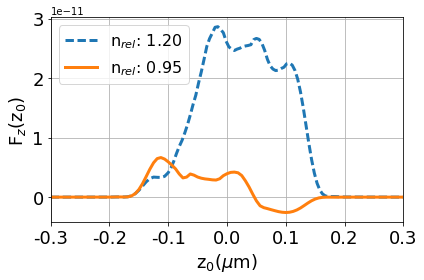

In [39]:
# LIP Frozen Wave longitudinal forces
fig_num += 1

ptc = SphericalParticle()
ptc.radius = 17.5e-6
ptc.medium_refractive_index = 1.33

beam_pos = (0, 0, 0)

paramx = {'param': 'beam_pos_z',
          'start': -200e-6,
          'stop': 200e-6,
          'num': 33,}

ptc.refractive_index = 1.2*1.33
X1, F1 = ptc.geo_opt_force(vfw, beam_pos, force_dir='fz', paramx=paramx)
label = r'n$_{rel}$: %.2f' % (ptc.refractive_index/1.33)
X1.insert(0, -300e-6)
X1.insert(len(X1), 300e-6)
F1.insert(0, 0)
F1.insert(len(F1), 0)
plt.plot(X1, [1*f for f in F1], '--', lw=3, label=label)

#ptc.refractive_index = 1.01*1.33
#X2, F2 = ptc.geo_opt_force(vfw, beam_pos, force_dir='fz', paramx=paramx)
#label = r'n$_{rel}$: %.2f (x5)' % (ptc.refractive_index/1.33)
#plt.plot(X2, [5*f for f in F2], '.', label=label)

#ptc.refractive_index = 1.005*1.33
#X3, F3 = ptc.geo_opt_force(vfw, beam_pos, force_dir='fz', paramx=paramx)
#label = r'n$_{rel}$: %.2f (x10)' % (ptc.refractive_index/1.33)
#plt.plot(X3, [10*f for f in F3], '--', label=label)

ptc.refractive_index = 0.95*1.33
X4, F4 = ptc.geo_opt_force(vfw, beam_pos, force_dir='fz', paramx=paramx)
label = r'n$_{rel}$: %.2f' % (ptc.refractive_index/1.33)
X4.insert(0, -300e-6)
X4.insert(len(X4), 300e-6)
F4.insert(0, 0)
F4.insert(len(F4), 0)
plt.plot(X4, [1*f for f in F4], '-', lw=3, label=label)

plt.xlim([-300e-6, 300e-6])

xlocs, xlabs = plt.xticks()
plt.xticks(xlocs, [xl*1e3 for xl in xlocs])

plt.legend(fontsize=16, loc=2)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.xlabel(r'z$_0$($\mu$m)', fontsize=18)
plt.ylabel(r'F$_z$(z$_0$)', fontsize=18)
plt.grid()
plt.tight_layout()
plt.savefig('LIP-const-longit-forces.png',  dpi=300)

plt.show()

In [38]:
paramx = {'param': 'beam_pos_z',
          'start': -200e-6,
          'stop': 200e-6,
          'num': 60,}

ptc.refractive_index = 1.2*1.33
X1, F1 = ptc.geo_opt_force(vfw, beam_pos, force_dir='fz', paramx=paramx)

ptc.refractive_index = 0.95*1.33
X4, F4 = ptc.geo_opt_force(vfw, beam_pos, force_dir='fz', paramx=paramx)

1/32
start: 31 Jul 2017 00:49:31


/home/arantespp/.local/lib/python3.5/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


time: 46.99316191673279

2/32
start: 31 Jul 2017 00:50:18
time: 947.3635447025299

3/32
start: 31 Jul 2017 01:06:05
time: 263.91467905044556

4/32
start: 31 Jul 2017 01:10:29
time: 447.0554974079132

5/32
start: 31 Jul 2017 01:17:56
time: 95.19142723083496

6/32
start: 31 Jul 2017 01:19:31
time: 1207.817138671875

7/32
start: 31 Jul 2017 01:39:39
time: 500.3865976333618

8/32
start: 31 Jul 2017 01:47:59
time: 284.86095809936523

9/32
start: 31 Jul 2017 01:52:44
time: 845.471851348877

10/32
start: 31 Jul 2017 02:06:50
time: 974.1398148536682

11/32
start: 31 Jul 2017 02:23:04
time: 107.81460213661194

12/32
start: 31 Jul 2017 02:24:52
time: 1121.5914351940155

13/32
start: 31 Jul 2017 02:43:33
time: 1000.1660635471344

14/32
start: 31 Jul 2017 03:00:14
time: 98.11014771461487

15/32
start: 31 Jul 2017 03:01:52
time: 95.29056882858276

16/32
start: 31 Jul 2017 03:03:27
time: 92.9080491065979

17/32
start: 31 Jul 2017 03:05:00
time: 72.92085528373718

18/32
start: 31 Jul 2017 03:06:13
ti

/home/arantespp/.local/lib/python3.5/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


time: 439.1423852443695

8/14
start: 31 Jul 2017 03:45:03
time: 186.64960741996765

9/14
start: 31 Jul 2017 03:48:10
time: 279.8331904411316

10/14
start: 31 Jul 2017 03:52:50
time: 153.360764503479

11/14
start: 31 Jul 2017 03:55:23
time: 127.22786402702332

12/14
start: 31 Jul 2017 03:57:30
time: 98.29050469398499

13/14
start: 31 Jul 2017 03:59:08
time: 42.53306221961975

14/14
start: 31 Jul 2017 03:59:51
time: 13.211989879608154

